# DATA 607 - Machine Learning

## Class 4 &mdash; 2025.07.09

### Imbalanced classification. Text data.

In [49]:
! pip install -U ipywidgets

  Using cached ipywidgets-8.1.7-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.14-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.15-py3-none-any.whl.metadata (20 kB)
Using cached ipywidgets-8.1.7-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.15-py3-none-any.whl (216 kB)
Using cached widgetsnbextension-4.0.14-py3-none-any.whl (2.2 MB)

   -------------------------- ------------- 2/3 [ipywidgets]
   ---------------------------------------- 3/3 [ipywidgets]



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
    # Pipeline chains preprocessing (StandardScaler) and KNN classifier together
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

#### One more word on overfitting

Training error being significantly smaller than testing error doesn't necessarily mean there's a problem.

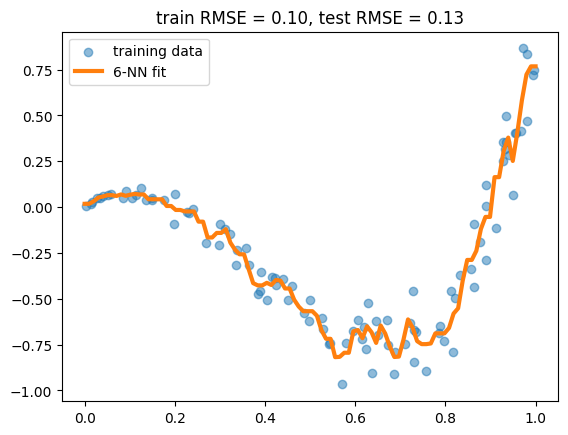

In [50]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error


def make_data(n=100, rng=None):
    rng = np.random.default_rng(rng)
    x = rng.uniform(size=n)
    y = 10 * x * (x - 0.2) * (x - 0.9) + 10 * x * 0.02 * rng.normal(size=n)
    return x, y


rng = np.random.default_rng(0)

x_train, y_train = make_data(100, rng=rng)
X_train = x_train.reshape(-1, 1)

x_test, y_test = make_data(10000, rng=rng)
X_test = x_test.reshape(-1, 1)


model = KNeighborsRegressor(n_neighbors=6)
model.fit(X_train, y_train)
train_mse = np.mean(root_mean_squared_error(y_train, model.predict(X_train)))
test_mse = np.mean(root_mean_squared_error(y_test, model.predict(X_test)))

grid = np.linspace(0, 1, 100)
plt.scatter(x_train, y_train, alpha=0.5, label="training data")
plt.plot(grid, model.predict(grid.reshape(-1, 1)), "C1", lw=3, label="6-NN fit")
plt.legend()
plt.title(f"train RMSE = {train_mse:.2f}, test RMSE = {test_mse:.2f}")
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = np.random.normal(size=(10000, 20))
beta = np.random.normal(size=20)
e = np.random.normal(size=10000)
y = X @ beta + e

X_train = X[:5000]
y_train = y[:5000]
model = LinearRegression()
model.fit(X_train, y_train)
print(f"{mean_squared_error(y_train, model.predict(X_train))=}")

X_test = X[5000:]
y_test = y[5000:]

print(f"{mean_squared_error(y_test, model.predict(X_test))=}")

mean_squared_error(y_train, model.predict(X_train))=1.021785561356257
mean_squared_error(y_test, model.predict(X_test))=1.0198633151511938


#### Imbalanced classification

- When a binary classification dataset is highly imbalanced, say $\mathbb{P}[Y=0]\approx 1$, then the constant classifier $\hat{y}=0$ has accuracy $\approx 1$.

- In these situations, the **false negative rate (FNR)** is $\approx 1$, which is as bad as it can be. Here,
  $$
  \text{FNR} = \mathbb{P}[\hat{y}=0\mid y=1].
  $$

- In typical applications like credit risk, customer retention, information retrieval, fraud detection, or disease screening, this is bad! In such examples, good performance on the minority class is the whole point!

#### Metrics (scores) for imbalanced classification

- **precision**: $\mathbb{P}[y=1\mid\hat{y}=1]$

- **recall**: $\mathbb{P}[\hat{y}=1\mid y=1] = 1 - \text{FNR}$

- **$F_1$**: $\displaystyle\dfrac{1}{\displaystyle\frac12\left(\dfrac1{\text{precision}} + \dfrac1{\text{recall}}\right)}=\dfrac{2\cdot\text{precision}\cdot\text{recall}}{\text{precision} + \text{recall}}$

In [4]:
X = pd.read_csv("data/Default.csv")
y = X.pop("default")
X

,student,balance,income
0,0,729.526495,44361.625074
1,1,817.180407,12106.134700
2,0,1073.549164,31767.138947
3,0,529.250605,35704.493935
4,0,785.655883,38463.495879
...,...,...,...
9995,0,711.555020,52992.378914
9996,0,757.962918,19660.721768
9997,0,845.411989,58636.156984
9998,0,1569.009053,36669.112365


In [5]:
y.value_counts()

default
0    9667
1     333
Name: count, dtype: int64

In [6]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

model = DummyClassifier()
model.fit(X, y)
accuracy = accuracy_score(y, model.predict(X))
precision = precision_score(y, model.predict(X))
recall = recall_score(y, model.predict(X))
f1 = f1_score(y, model.predict(X))
print(f"{accuracy=}, {precision=}, {recall=}, {f1=}")

accuracy=0.9667, precision=0.0, recall=0.0, f1=0.0


C:\Users\frlin\OneDrive\Documentos\_uofc\2025 Summer\DATA_607\gh_note\DATA607S2025\.venv_home\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [7]:
model = LogisticRegression()
model.fit(X, y)
accuracy = accuracy_score(y, model.predict(X))
precision = precision_score(y, model.predict(X))
recall = recall_score(y, model.predict(X))
f1 = f1_score(y, model.predict(X))
print(f"{accuracy=}, {precision=}, {recall=}, {f1=}")

accuracy=0.9732, precision=0.7241379310344828, recall=0.3153153153153153, f1=0.4393305439330544


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline


model = make_pipeline(StandardScaler(), KNeighborsClassifier())
model.fit(X, y)
accuracy = accuracy_score(y, model.predict(X))
precision = precision_score(y, model.predict(X))
recall = recall_score(y, model.predict(X))
f1 = f1_score(y, model.predict(X))
print(f"{accuracy=}, {precision=}, {recall=}, {f1=}")

accuracy=0.9748, precision=0.7165775401069518, recall=0.4024024024024024, f1=0.5153846153846153


In [9]:
from sklearn.model_selection import RepeatedStratifiedKFold

# Define parameter grid for GridSearchCV; we specify parameters for scaler and KNN
param_grid = {
    # 'with_std' parameter controls scaling to unit variance; True = scale, False = just center
    "standardscaler__with_std": [False, True],
    # Number of neighbors to try for KNN; np.arange(1, 30, 2) gives odd numbers from 1 to 29
    "kneighborsclassifier__n_neighbors": np.arange(1, 30, 2),
}
# Create GridSearchCV object to find best parameter combination
search = GridSearchCV(
    # Pipeline chains preprocessing (StandardScaler) and KNN classifier together
    make_pipeline(StandardScaler(), KNeighborsClassifier()),
# Define parameter grid for GridSearchCV; we specify parameters for scaler and KNN
    param_grid=param_grid,
    # Use F1 score to evaluate model; balances precision and recall
    scoring="f1",
    # Use repeated stratified K-fold cross-validation to get robust error estimates
    cv=RepeatedStratifiedKFold(n_repeats=20),
)

search.fit(X, y)

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'kneighborsclassifier__n_neighbors': array([ 1, 3..., 25, 27, 29]), 'standardscaler__with_std': [False, True]}"
,scoring,'f1'
,n_jobs,None
,refit,True
,cv,RepeatedStrat...om_state=None)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [10]:
results = pd.DataFrame(search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,param_standardscaler__with_std,params,split0_test_score,split1_test_score,split2_test_score,...,split93_test_score,split94_test_score,split95_test_score,split96_test_score,split97_test_score,split98_test_score,split99_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005837,0.004470,0.005356,0.004602,1,False,"{'kneighborsclassifier__n_neighbors': 1, 'stan...",0.289855,0.325581,0.240000,...,0.367647,0.288000,0.278689,0.288000,0.343284,0.294118,0.373984,0.306612,0.049196,16
1,0.005065,0.001323,0.005451,0.001763,1,True,"{'kneighborsclassifier__n_neighbors': 1, 'stan...",0.368794,0.400000,0.333333,...,0.369863,0.367647,0.363636,0.403101,0.328571,0.394366,0.325581,0.354414,0.042639,15
2,0.004131,0.000818,0.004290,0.000940,3,False,"{'kneighborsclassifier__n_neighbors': 3, 'stan...",0.333333,0.244898,0.260870,...,0.392523,0.288889,0.202247,0.239130,0.377358,0.228571,0.322581,0.293089,0.056464,17
3,0.004174,0.000462,0.005014,0.000481,3,True,"{'kneighborsclassifier__n_neighbors': 3, 'stan...",0.453782,0.472727,0.314815,...,0.496000,0.496000,0.370370,0.411765,0.341880,0.450000,0.365385,0.396612,0.052151,14
4,0.004031,0.000644,0.004536,0.000978,5,False,"{'kneighborsclassifier__n_neighbors': 5, 'stan...",0.356436,0.227848,0.159091,...,0.292135,0.252874,0.146341,0.214286,0.340426,0.244444,0.240964,0.254268,0.056358,18
5,0.004191,0.000840,0.005483,0.000960,5,True,"{'kneighborsclassifier__n_neighbors': 5, 'stan...",0.428571,0.489796,0.326531,...,0.540984,0.457143,0.383838,0.407767,0.425926,0.513274,0.361702,0.415157,0.051896,7
6,0.003807,0.000143,0.005060,0.005602,7,False,"{'kneighborsclassifier__n_neighbors': 7, 'stan...",0.314607,0.179487,0.168675,...,0.195122,0.250000,0.155844,0.235294,0.279070,0.175000,0.205128,0.206844,0.052898,19
7,0.004199,0.000777,0.005926,0.000876,7,True,"{'kneighborsclassifier__n_neighbors': 7, 'stan...",0.491228,0.505051,0.356436,...,0.500000,0.457143,0.380000,0.431373,0.438095,0.495575,0.344086,0.433114,0.056202,1
8,0.004090,0.001001,0.004973,0.000765,9,False,"{'kneighborsclassifier__n_neighbors': 9, 'stan...",0.285714,0.133333,0.100000,...,0.151899,0.184211,0.105263,0.106667,0.177215,0.205128,0.135135,0.159614,0.049778,20
9,0.004019,0.000415,0.006149,0.000522,9,True,"{'kneighborsclassifier__n_neighbors': 9, 'stan...",0.495413,0.434783,0.333333,...,0.490909,0.450980,0.432990,0.435644,0.420000,0.517857,0.347826,0.431997,0.052726,2


In [11]:
print(search.best_params_)
print(search.best_score_)

{'kneighborsclassifier__n_neighbors': np.int64(7), 'standardscaler__with_std': True}
0.4331135465338726


Note that this is worse than the $F_1$-score from above! But those were tainted -- they're training scores. We didn't do any data splitting above.

Let's try again, doing things correctly.

In [12]:
from sklearn.model_selection import cross_val_score

cross_val_score(
    LogisticRegression(max_iter=1000), X, y, scoring="f1", cv=RepeatedStratifiedKFold()
).mean()

np.float64(0.4392637360088037)

In [13]:
cross_val_score(
    make_pipeline(StandardScaler(), KNeighborsClassifier()),
    X,
    y,
    scoring="f1",
    cv=RepeatedStratifiedKFold(),
).mean()

np.float64(0.40990802294091644)

### 20newsgroups

> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.
>
>  &mdash; [the Scikit Learn docs](https://scikit-learn.org/stable/datasets/real_world.html#newsgroups-dataset)

- The posts include headers, footers, and quotes. As it turns out, this really helps with classification! We'll work without them, though.

- Since we'll be focusing on model building, we won't touch the test set. We'll draw validation sets from the training data.

In [14]:
# 20newsgroups, a real-world dataset

from sklearn.datasets import fetch_20newsgroups
from sklearn.utils import Bunch


bunch = fetch_20newsgroups(subset="train", remove=("headers", "footers", "quotes"))
assert isinstance(bunch, Bunch)

X = bunch.data
y = bunch.target

print(f"y[0] = {bunch.target_names[y[0]]}\n\nX[0] = {X[0]}")

y[0] = rec.autos

X[0] = I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


In [15]:
from collections import Counter

Counter(y)

Counter({np.int64(10): 600,
         np.int64(15): 599,
         np.int64(8): 598,
         np.int64(9): 597,
         np.int64(11): 595,
         np.int64(7): 594,
         np.int64(13): 594,
         np.int64(14): 593,
         np.int64(5): 593,
         np.int64(2): 591,
         np.int64(12): 591,
         np.int64(3): 590,
         np.int64(6): 585,
         np.int64(1): 584,
         np.int64(4): 578,
         np.int64(17): 564,
         np.int64(16): 546,
         np.int64(0): 480,
         np.int64(18): 465,
         np.int64(19): 377})

In [16]:
bunch.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
print(len(X_train), len(X_test))

5657 5657


## Sparse embeddings with `CountVectorizer`

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

counter = CountVectorizer()
counts = counter.fit_transform(X_train)
print(f"{counts=}")

print(
    f"proportion of nonzero entries = {len(counts.indices)/(counts.shape[0]*counts.shape[1]):.4f}"
)

counts=<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 549196 stored elements and shape (5657, 68484)>
proportion of nonzero entries = 0.0014


In [19]:
I, J = counts.nonzero()
I, J

(array([   0,    0,    0, ..., 5656, 5656, 5656],
       shape=(549196,), dtype=int32),
 array([47865, 38082, 23003, ..., 32632, 34711, 20106],
       shape=(549196,), dtype=int32))

In [20]:
counter.vocabulary_

{'phoned': 47865,
 'licensing': 38082,
 'division': 23003,
 'in': 33276,
 'washington': 64848,
 'state': 57541,
 'to': 60405,
 'ask': 12991,
 'for': 27712,
 'an': 11986,
 'application': 12508,
 'ccw': 17361,
 'instead': 33928,
 'they': 59940,
 'promptly': 49510,
 'sent': 55098,
 'me': 40724,
 'applicationfor': 12509,
 'becoming': 14500,
 'firearms': 27226,
 'dealer': 21405,
 'how': 31910,
 'much': 42931,
 'better': 14803,
 'get': 29111,
 'wisdom': 65563,
 'than': 59804,
 'gold': 29535,
 'choose': 17936,
 'understanding': 62126,
 'rather': 51225,
 'silver': 55869,
 'still': 57739,
 'mastering': 40268,
 'the': 59827,
 'language': 37383,
 'eh': 24450,
 'notice': 44640,
 'use': 62768,
 'of': 45421,
 'apparently': 12461,
 'as': 12927,
 'if': 32803,
 'not': 44617,
 'denying': 21937,
 'that': 59819,
 'at': 13185,
 'all': 11659,
 'but': 16364,
 'every': 25694,
 'day': 21292,
 'is': 34514,
 'another': 12222,
 'chance': 17640,
 'good': 29583,
 'ending': 24959,
 'why': 65344,
 'push': 49970,
 'it

### `MultinomialNaiveBayes`

In [21]:
from sklearn.naive_bayes import MultinomialNB

model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train, y_train)
print(f"{accuracy_score(y_train, model.predict(X_train))=}")
print(f"{accuracy_score(y_test, model.predict(X_test))=}")

accuracy_score(y_train, model.predict(X_train))=0.7162807141594485
accuracy_score(y_test, model.predict(X_test))=0.483295032702846


- Can we improve predictive performance by tuning the `alpha` parameter of the `MultinomialNB` model?

In [22]:
# Define parameter grid for GridSearchCV; we specify parameters for scaler and KNN
param_grid = {"multinomialnb__alpha": [0.001, 0.01, 0.1, 1, 10]}
    # Pipeline chains preprocessing (StandardScaler) and KNN classifier together
model = make_pipeline(CountVectorizer(), MultinomialNB())
# Define parameter grid for GridSearchCV; we specify parameters for scaler and KNN
search = GridSearchCV(model, param_grid, scoring="accuracy")
best_model = search.fit(X_train, y_train).best_estimator_  # returns the best estimator
display(best_model)

print(f"{search.best_params_=}")
print(f"{search.best_score_=}")
print(f"{accuracy_score(y_test, best_model.predict(X_test))=}")

,steps,"[('countvectorizer', ...), ('multinomialnb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


search.best_params_={'multinomialnb__alpha': 0.01}
search.best_score_=np.float64(0.6632501023204082)
accuracy_score(y_test, best_model.predict(X_test))=0.6841081845501149


### Tuning `CountVectorizer` for `MultinomialNaiveBayes`
- `CountVectorizer` also has knobs we can twiddle. See [its documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) for details.

In [23]:
# Define parameter grid for GridSearchCV; we specify parameters for scaler and KNN
param_grid = {
    "countvectorizer__stop_words": [None, "english"],
    "countvectorizer__strip_accents": [None, "ascii"],
}
    # Pipeline chains preprocessing (StandardScaler) and KNN classifier together
model = make_pipeline(CountVectorizer(), MultinomialNB(alpha=0.1))
# Define parameter grid for GridSearchCV; we specify parameters for scaler and KNN
search = GridSearchCV(model, param_grid, scoring="accuracy")
best_model = search.fit(X_train, y_train).best_estimator_  # returns the best estimator
display(best_model)

print(f"{search.best_params_=}")
print(f"{search.best_score_=}")
print(f"{accuracy_score(y_test, best_model.predict(X_test))=}")

,steps,"[('countvectorizer', ...), ('multinomialnb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


search.best_params_={'countvectorizer__stop_words': 'english', 'countvectorizer__strip_accents': None}
search.best_score_=np.float64(0.6717351979079773)
accuracy_score(y_test, best_model.predict(X_test))=0.6895881209121443


In [24]:
from sklearn.model_selection import RandomizedSearchCV

In [25]:
# Define parameter grid for GridSearchCV; we specify parameters for scaler and KNN
param_grid = {"countvectorizer__max_df": [0.2, 0.4, 0.6, 0.8, 1.0]}
    # Pipeline chains preprocessing (StandardScaler) and KNN classifier together
model = make_pipeline(CountVectorizer(stop_words="english"), MultinomialNB(alpha=0.1))
# Define parameter grid for GridSearchCV; we specify parameters for scaler and KNN
search = GridSearchCV(model, param_grid, scoring="accuracy")
best_model = search.fit(X_train, y_train).best_estimator_  # returns the best estimator
display(best_model)

print(f"{search.best_params_=}")
print(f"{search.best_score_=}")
print(f"{accuracy_score(y_test, best_model.predict(X_test))=}")

,steps,"[('countvectorizer', ...), ('multinomialnb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


search.best_params_={'countvectorizer__max_df': 0.4}
search.best_score_=np.float64(0.6717351979079773)
accuracy_score(y_test, best_model.predict(X_test))=0.6895881209121443


##### Exercise

- Can you improve performance by tuning `CountVectorizer`'s `min_df` parameter?

### `LogisticRegression`

In [26]:
! pip install -U icecream sentence-transformers

  Using cached torch-2.7.1-cp313-cp313-win_amd64.whl.metadata (28 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached regex-2024.11.6-cp313-cp313-win_amd64.whl.metadata (41 kB)
  Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl.metadata (3.9 kB)
  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   -------- ------------------------------- 2.4/10.8 MB 11.6 MB/s eta 0:00:01
   ----------------- ---------------------- 4.7/10.8 MB 11.7 MB/s eta 0:00:01
   ------------------------- -------------- 6.8/10.8 MB 11.7 MB/s eta 0:00:01
   ---------------------------------- ----- 9.4/10.8 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------- 10.8/10.8 MB 11.5 MB/s eta 0:00:00
 

In [27]:
from icecream import ic
model = make_pipeline(
    CountVectorizer(stop_words="english", max_df=0.2), LogisticRegression()
)
model.fit(X_train, y_train)
ic(accuracy_score(y_train, model.predict(X_train)))
ic(accuracy_score(y_test, model.predict(X_test)))

ic| accuracy_score(y_train, model.predict(X_train)): 0.9729538624712746
ic| accuracy_score(y_test, model.predict(X_test)): 0.6524659713629132


0.6524659713629132

In [28]:
# Define parameter grid for GridSearchCV; we specify parameters for scaler and KNN
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10]}
    # Pipeline chains preprocessing (StandardScaler) and KNN classifier together
model = make_pipeline(
    CountVectorizer(stop_words="english", max_df=0.2), LogisticRegression()
)
# Define parameter grid for GridSearchCV; we specify parameters for scaler and KNN
search = GridSearchCV(model, param_grid, scoring="accuracy")
best_model = search.fit(X_train, y_train).best_estimator_  # returns the best estimator
display(best_model)

ic(search.best_params_)
ic(search.best_score_)
ic(accuracy_score(y_test, best_model.predict(X_test)))

C:\Users\frlin\OneDrive\Documentos\_uofc\2025 Summer\DATA_607\gh_note\DATA607S2025\.venv_home\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\frlin\OneDrive\Documentos\_uofc\2025 Summer\DATA_607\gh_note\DATA607S2025\.venv_home\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_i

,steps,"[('countvectorizer', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


ic| search.best_params_: {'logisticregression__C': 0.1}
ic| search.best_score_: np.float64(0.6461019829851316)
ic| accuracy_score(y_test, best_model.predict(X_test)): 0.6648400212126568


0.6648400212126568

### `SGDClassifier`

In [29]:
from sklearn.linear_model import SGDClassifier

# Define parameter grid for GridSearchCV; we specify parameters for scaler and KNN
param_grid = {"sgdclassifier__alpha": [0.0001, 0.001, 0.01, 0.1, 1.0]}
    # Pipeline chains preprocessing (StandardScaler) and KNN classifier together
model = make_pipeline(
    CountVectorizer(stop_words="english", max_df=0.2), SGDClassifier()
)
# Define parameter grid for GridSearchCV; we specify parameters for scaler and KNN
search = GridSearchCV(model, param_grid, scoring="accuracy")
best_model = search.fit(X_train, y_train).best_estimator_  # returns the best estimator
display(best_model)

ic(search.best_params_)
ic(search.best_score_)
ic(accuracy_score(y_test, best_model.predict(X_test)))

,steps,"[('countvectorizer', ...), ('sgdclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


ic| search.best_params_: {'sgdclassifier__alpha': 0.01}
ic| search.best_score_: np.float64(0.682516800854805)
ic| accuracy_score(y_test, best_model.predict(X_test)): 0.6879971716457486


0.6879971716457486

##### `Normalizer` to normalize rows

- Contrast with `StandardScaler` that operates on columns.

In [30]:
from sklearn.preprocessing import Normalizer

A = np.random.normal(size=(2, 4))

normalizer = Normalizer()

assert np.allclose(
    normalizer.fit_transform(A), A / np.linalg.norm(A, axis=1, keepdims=True)
)

- Default parameter values usually work better with normalized data.

In [31]:
# Normalize the count data, can use the default value for alpha in SGDClassifier

from sklearn.linear_model import SGDClassifier


model = make_pipeline(
    CountVectorizer(stop_words="english", max_df=0.2), Normalizer(), SGDClassifier()
)
display(model)

model.fit(X_train, y_train)
ic(accuracy_score(y_test, model.predict(X_test)))

,steps,"[('countvectorizer', ...), ('normalizer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


ic| accuracy_score(y_test, model.predict(X_test)): 0.7077956514053385


0.7077956514053385

### `SVC` (Support Vector Classifier)

In [32]:
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer

model = make_pipeline(
    CountVectorizer(stop_words="english", max_df=0.2),
    Normalizer(),  # SVC is sensitive to normalization!
    SVC(kernel="linear", C=1.0),
)

model.fit(X_train, y_train)

ic(accuracy_score(y_test, model.predict(X_test)))

ic| accuracy_score(y_test, model.predict(X_test)): 0.6644864769312356


0.6644864769312356

In [33]:
from sklearn.svm import LinearSVC

model = make_pipeline(
    CountVectorizer(stop_words="english", max_df=0.2),
    Normalizer(),  # LinearSVC is sensitive to normalization!
    LinearSVC(loss="hinge", max_iter=10000),
)

model.fit(X_train, y_train)

ic(accuracy_score(y_test, model.predict(X_test)))

ic| accuracy_score(y_test, model.predict(X_test)): 0.7086795121088917


0.7086795121088917

### IDF (Inverse Document Frequency) weighting

- Words that apear in lots of documents, are "less informative".

- ***Document frequency*** of the term $t$:
  $$
  \begin{aligned}
  \operatorname{df}(t) &= \text{proportion of documents containing $t$}
  \end{aligned}
  $$

- ***Inverse document frequency*** of the term $t$:
  $$
  \operatorname{idf}(t) = \log\frac1{\operatorname{df}(t)}
  $$
  Even though it's not reflected in the name, the logarithmic scaling is standard.

- Scikit Learn does some extra smoothing by default, so these aren't the exact quantities it computes.

### `TfidfVectorizer`

- Weights each term-count by the corresponding inverse document frequency.

- Concretely, `TfidfVectorizer` multiplies the $j$-th column of the count matrix returned by `CountVectorizer.transform` by the inverse document frequency of the $j$-th term. Each row of the resulting matrix is then normalized to have length $1$.

- This is a bit trick in practice because of *sparse matrices*, but here it is explicitly:

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

count_vectorizer = CountVectorizer().fit(X_train)
counts = count_vectorizer.transform(X_train)

tfidf_vectorizer = TfidfVectorizer().fit(X_train)
assert tfidf_vectorizer.vocabulary_ == count_vectorizer.vocabulary_


document_indices, term_indices = counts.nonzero()
smoothed_counts = counts.astype(float)
idf_weights = tfidf_vectorizer.idf_[term_indices]
smoothed_counts.data *= idf_weights

assert np.allclose(
    normalize(smoothed_counts).data, tfidf_vectorizer.transform(X_train).data
)
assert np.all(
    normalize(smoothed_counts).indices == tfidf_vectorizer.transform(X_train).indices
)

- Let's try it out with `LinearSVC`

In [35]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer


model = make_pipeline(
    TfidfVectorizer(stop_words="english"),
    LinearSVC(loss="hinge", max_iter=10000),
)

model.fit(X_train, y_train)

ic(accuracy_score(y_test, model.predict(X_test)))

ic| accuracy_score(y_test, model.predict(X_test)): 0.7426197631253314


0.7426197631253314

### Back to `MultinomialNaiveBayes`

In [36]:
model = make_pipeline(
    TfidfVectorizer(
        stop_words="english"
    ),  # Try letting stop_words revert to the default!
    MultinomialNB(),
)

model.fit(X_train, y_train)

ic(accuracy_score(y_test, model.predict(X_test)))

ic| accuracy_score(y_test, model.predict(X_test)): 0.6971893229627011


0.6971893229627011

Retune `alpha`...

In [37]:
# Define parameter grid for GridSearchCV; we specify parameters for scaler and KNN
param_grid = {"multinomialnb__alpha": np.logspace(-2, -1, 20)}

# With a higher value of alpha, stop-words don't help anymore.
# Regularization can often be used in place of feature selection.

    # Pipeline chains preprocessing (StandardScaler) and KNN classifier together
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Define parameter grid for GridSearchCV; we specify parameters for scaler and KNN
search = GridSearchCV(model, param_grid, scoring="accuracy")
best_model = search.fit(X_train, y_train).best_estimator_
display(best_model)

ic(search.best_params_)
ic(search.best_score_)
ic(accuracy_score(y_test, best_model.predict(X_test)))

,steps,"[('tfidfvectorizer', ...), ('multinomialnb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


ic| search.best_params_: {'multinomialnb__alpha': np.float64(0.01)}
ic| search.best_score_: np.float64(0.7171612413418189)
ic| accuracy_score(y_test, best_model.predict(X_test)): 0.7438571681103058


0.7438571681103058

## Pretrained embeddings

### GLoVe embeddings

- Pennington, Socher, Manning (2014). **GloVe: Global Vectors for Word Representation**.

- https://nlp.stanford.edu/projects/glove/

In [38]:
! wget http://nlp.stanford.edu/data/glove.6B.zip
! unzip glove.6B.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


```bash
wget http://nlp.stanford.edu/data/glove.6B.zip
unzip -l glove.6B.zip
```

```output
Archive:  glove.6B.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
171350079  08-04-2014 14:15   glove.6B.50d.txt
347116733  08-04-2014 14:14   glove.6B.100d.txt
693432828  08-04-2014 14:14   glove.6B.200d.txt
1037962819  08-27-2014 13:19   glove.6B.300d.txt
---------                     -------
2249862459                     4 files
```

In [39]:
embeddings = np.zeros((400000, 300))
vocabulary = []

with open("glove.6B.300d.txt", encoding="utf-8") as f:
    for i, line in enumerate(f):
        word, coeffs = line.split(maxsplit=1)
        vocabulary.append(word)
        embeddings[i] = np.fromstring(coeffs, sep=" ")

print(len(vocabulary))

400000


In [40]:
counter = CountVectorizer(vocabulary=vocabulary, stop_words="english")
counts_train = counter.fit_transform(X_train)
counts_test = counter.transform(X_test)

W_train = normalize(counts_train @ embeddings)
W_test = normalize(counts_test @ embeddings)

In [41]:
model = LinearSVC()
model.fit(W_train, y_train)
ic(accuracy_score(y_test, model.predict(W_test)))

ic| accuracy_score(y_test, model.predict(W_test)): 0.6485769842672795


0.6485769842672795

### GTE (General Text Embeddings)

- See [https://huggingface.co/thenlper/gte-small](https://huggingface.co/thenlper/gte-small).

![GTE Model Card](assets/gte_small_model_card.png)

In [42]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("thenlper/gte-small")
X_train_gte_small = model.encode(X_train)
X_test_gte_small = model.encode(X_test)

# Takes a few minutes...

C:\Users\frlin\OneDrive\Documentos\_uofc\2025 Summer\DATA_607\gh_note\DATA607S2025\.venv_home\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\frlin\OneDrive\Documentos\_uofc\2025 Summer\DATA_607\gh_note\DATA607S2025\.venv_home\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\frlin\.cache\huggingface\hub\models--thenlper--gte-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Wi

In [43]:
np.savez(
    "20newsgroups_gte_small.npz",
    X_train_gte_small=X_train_gte_small,
    X_test_gte_small=X_test_gte_small,
    y_train=y_train,
    y_test=y_test,
)

In [44]:
data = np.load("20newsgroups_gte_small.npz")
X_train_gte_small = data["X_train_gte_small"]
X_test_gte_small = data["X_test_gte_small"]
y_train = data["y_train"]
y_test = data["y_test"]

ic(X_train_gte_small.shape, X_test_gte_small.shape, y_train.shape, y_test.shape)

ic| X_train_gte_small.shape: (5657, 384)
    X_test_gte_small.shape: (5657, 384)
    y_train.shape: (5657,)
    y_test.shape: (5657,)


((5657, 384), (5657, 384), (5657,), (5657,))

In [45]:
model = SGDClassifier()
model.fit(X_train_gte_small, y_train)
accuracy_score(y_test, model.predict(X_test_gte_small))

0.724942549054269

In [46]:
model = LinearSVC()
model.fit(X_train_gte_small, y_train)
accuracy_score(y_test, model.predict(X_test_gte_small))

0.7399681810146721

### Proximity in embedding space reflects semantic similarity

- Euclidean distance in embedding space:
  $$
  \operatorname{L}(x, x') = \|\operatorname{embedding}(x) - \operatorname{embedding}(x')\|
  $$

- Cosine similarity in embedding space:
  $$
  \operatorname{S}(x, x') = \cos\big(\text{angle between $\operatorname{embedding}(x)$ and $\operatorname{embedding}(x')$}\big)
  $$



In [47]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from collections import Counter

i = 1234

x = X_test_gte_small[i]
ic(y_test[i])

I = (
    cosine_similarity(x.reshape(1, -1), X_train_gte_small)
    .squeeze()
    .argsort()[::-1][:50]
)

ic(Counter(y_train[I]))

nns = NearestNeighbors()
nns.fit(X_train_gte_small)
distances, J = nns.kneighbors(x.reshape(1, -1), 50)
J = J.squeeze()
ic(Counter(y_train[J]))

ic| y_test[i]: np.int64(17)
ic| Counter(y_train[I]): Counter({np.int64(17): 50})
ic| Counter(y_train[J]): Counter({np.int64(17): 50})


Counter({np.int64(17): 50})

### Relevance of a document to a query

- We want to retrieve documents from a collection that are most relevant to a query.

- There are many ways to assign a **relevance score** $\operatorname{score}(D, Q)$ indicating the relevance of a document $D$ to a query $Q$.

- BM25:
  $$
  \operatorname{S}(D, Q) = \sum_{t\in Q}\operatorname{idf}(t)
  \frac{f(t, D)(k_1 + 1)}{f(t, D) + k_1\left(1 - b + b\frac{\operatorname{len}(D)}{\text{av.doc.len.}}\right)}
  $$
  Here, $f(t, D)$ be the frequency of occurence of term $t$ in document $D$, i.e., how many times it appears.

#### Vector search

- Euclidean distance in embedding space:
  $$
  \operatorname{S}(D, Q) = \|\operatorname{embedding}(D) - \operatorname{embedding}(Q)\|
  $$

- Cosine similarity in embedding space:
  $$
  \operatorname{S}(D, Q) = \cos\big(\text{angle between $\operatorname{embedding}(D)$ and $\operatorname{embedding}(Q)$}\big)
  $$

- Used for semantic search, recommendation/ranking, ...

- The R in RAG (Retrieval Augmented Generation)

In [48]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from collections import Counter

i = 1234

x = X_test_gte_small[i]
ic(y_test[i])

I = (
    cosine_similarity(x.reshape(1, -1), X_train_gte_small)
    .squeeze()
    .argsort()[::-1][:50]
)

ic(Counter(y_train[I]))

nns = NearestNeighbors()
nns.fit(X_train_gte_small)
distances, J = nns.kneighbors(x.reshape(1, -1), 50)
J = J.squeeze()
ic(Counter(y_train[J]))

ic| y_test[i]: np.int64(17)
ic| Counter(y_train[I]): Counter({np.int64(17): 50})
ic| Counter(y_train[J]): Counter({np.int64(17): 50})


Counter({np.int64(17): 50})